In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gensim
from gensim.models import word2vec  
from sklearn.manifold import TSNE  
import re  
import nltk  
from nltk.corpus import stopwords  
from nltk.stem.porter import *  
stemmer = PorterStemmer()  

ModuleNotFoundError: No module named 'sklearn'

In [2]:
data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv',delimiter = ',')
df = pd.DataFrame(data)
df.head()
df.shape[0]
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [3]:
def rewiew_to(raw):
    if isinstance(raw,float):
        raw = str(raw)
    letters_only = re.sub("[^a-zA-Z]", " ",raw)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    m_words = [w for w in words if not w in stops]
    singles = [stemmer.stem(word) for word in m_words]
    return (" ".join(singles))

In [4]:
proc = [rewiew_to(text) for text in df["Summary"]]

In [5]:
df["Tokin"] = proc
df.to_csv("new_crash.csv")

In [6]:
def str_to_lst(text):
    res = []
    for elem in text:
        res.append([w for w in elem.split()])
    return res

In [7]:
res = str_to_lst(proc)

In [21]:
model = word2vec.Word2Vec(res, window=5, min_count=100, workers=4)  
len(model.wv)

In [30]:
def show_model(model):
    labeles = []
    tokens = []
    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labeles.append(word)
    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=40, n_components=2,init='pca', max_iter=2500)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(8,8))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labeles[i],xy = (x[i],y[i]),xytext = (5,2),
        textcoords= 'offset points',ha = 'right',va = 'bottom')
    plt.show()
        
def n_values(model):
    labeles = []
    tokens = []
    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labeles.append(word)
    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=40, n_components=2,init='pca', max_iter=2500)
    new_values = tsne_model.fit_transform(tokens)
    return new_values

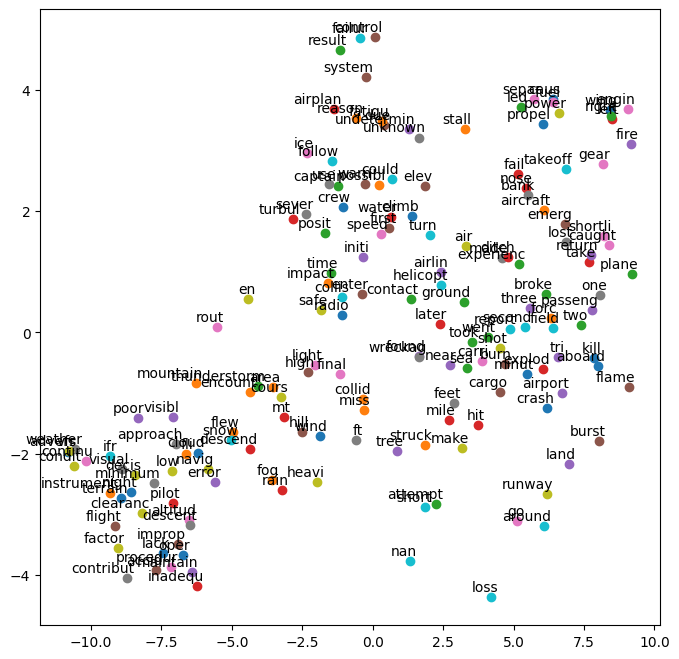

In [29]:
show_model(model)

In [12]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import *
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import pyspark.sql.functions as sf
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
#other types of regression models
#можно использовать и другие виды регрессии
#from pyspark.ml.regression import LinearRegression
#from pyspark.ml.regression import RandomForestRegressor
#from pyspark.ml.regression import GeneralizedLinearRegression
#from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

In [17]:
from pyspark import SparkContext, SparkConf, HiveContext
from pyspark.sql.functions import col, asc, desc

conf = SparkConf().setAppName('spark_dlab_app') 

# запуск сессии спарка
spark = SparkSession.builder.config(conf = conf).enableHiveSupport().getOrCreate()
spark

In [51]:
v = n_values(model)
nv = pd.DataFrame(v)
nv.to_csv("Vectors.csv",header = False,index = False)

In [52]:
nd  = spark.read.csv("Vectors.csv", sep=",",inferSchema=True)
nd.show()

+----------+----------+
|       _c0|       _c1|
+----------+----------+
| 2.9954448| -2.994468|
| 3.4696174|0.29097882|
|  6.339926| -1.176247|
|-10.113691|-3.5998197|
| 3.3241313|-4.0924215|
|-12.200564|-3.8783104|
| 6.6312203| 1.5142894|
|-9.9641075|-2.6354456|
| 2.4126348|-4.4026937|
| -3.054365| 3.6787314|
|-4.1110263|0.95119995|
|-9.2109785|-1.6604229|
|-1.1545073|-3.8376184|
|  4.829422|-0.8545292|
| 3.5250604|-2.8234024|
|-2.4925895| 3.6727784|
| -9.568221| -3.906086|
|-13.528896| -2.498734|
|-13.599714|-2.7797358|
|  4.316262| 0.8969714|
+----------+----------+
only showing top 20 rows



In [56]:
from pyspark.ml.feature import VectorAssembler 
from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

vec_assembler = VectorAssembler(inputCols = nd.columns, 
                                outputCol='features') 
  
final_data = vec_assembler.transform(nd) 
final_data.select('features').show(5)

+--------------------+
|            features|
+--------------------+
|[2.9954448,-2.994...|
|[3.4696174,0.2909...|
|[6.339926,-1.176247]|
|[-10.113691,-3.59...|
|[3.3241313,-4.092...|
+--------------------+
only showing top 5 rows



In [57]:
from pyspark.ml.feature import StandardScaler 
  
scaler = StandardScaler(inputCol="features",  
                        outputCol="scaledFeatures",  
                        withStd=True,  
                        withMean=False) 
  
# Compute summary statistics by fitting the StandardScaler 
scalerModel = scaler.fit(final_data) 
  
# Normalize each feature to have unit standard deviation. 
final_data = scalerModel.transform(final_data) 
  
final_data.select('scaledFeatures').show(5)

+--------------------+
|      scaledFeatures|
+--------------------+
|[0.52885464809765...|
|[0.61257122451747...|
|[1.11933270601254...|
|[-1.7856020898043...|
|[0.58688522281963...|
+--------------------+
only showing top 5 rows



In [59]:
#Importing the model 
from pyspark.ml.clustering import KMeans 
from pyspark.ml.evaluation import ClusteringEvaluator 
  
silhouette_score=[] 
  
evaluator = ClusteringEvaluator(predictionCol='prediction', 
                                featuresCol='scaledFeatures',  
                                metricName='silhouette',  
                                distanceMeasure='squaredEuclidean') 
  
for i in range(2,10): 
    kmeans=KMeans(featuresCol='scaledFeatures', k=i) 
    model=kmeans.fit(final_data) 
    predictions=model.transform(final_data) 
    score=evaluator.evaluate(predictions) 
    silhouette_score.append(score) 
    print('Silhouette Score for k =',i,'is',score)

Silhouette Score for k = 2 is 0.6446855167593665
Silhouette Score for k = 3 is 0.6401588431578981
Silhouette Score for k = 4 is 0.6375474845702053
Silhouette Score for k = 5 is 0.5193009541071036
Silhouette Score for k = 6 is 0.566881892309198
Silhouette Score for k = 7 is 0.554809238935551
Silhouette Score for k = 8 is 0.575266910216577
Silhouette Score for k = 9 is 0.5589557676067788


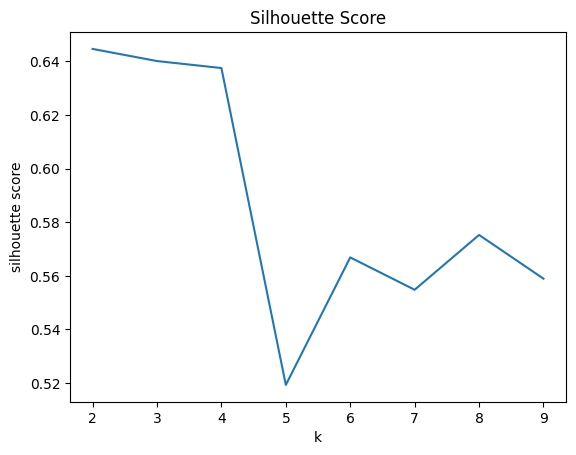

In [60]:
import matplotlib.pyplot as plt 
  
plt.plot(range(2,10),silhouette_score) 
plt.xlabel('k') 
plt.ylabel('silhouette score') 
plt.title('Silhouette Score') 
plt.show()

In [66]:
kmeans = KMeans(featuresCol='scaledFeatures',k=10) 
model = kmeans.fit(final_data) 
predictions = model.transform(final_data)

In [64]:
centers = model.clusterCenters() 
print("Cluster Centers: ") 
for center in centers: 
    print(center)

Cluster Centers: 
[ 0.28617222 -1.9793373 ]
[-0.5795924   1.20812507]
[ 0.12783653 -1.02953715]
[-1.94499519 -1.60702182]
[ 0.70018562 -0.55318525]
[-1.06437337 -1.09772245]
[-0.46348142 -0.19842333]
[-0.24791982  0.44481314]
[-0.86812335  0.33859777]
[0.7418808  0.71483701]
